# Batch UCB


In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import defaultdict
import math
import json

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import PairwiseKernel, DotProduct, RBF 
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import KFold
from sklearn_extra.cluster import KMedoids

from codes.embedding import Embedding
from codes.environment import Rewards_env
from codes.ucb import GPUCB, Random
from codes.evaluations import evaluate, plot_eva
from codes.regression import *
from codes.kernels_for_GPK import *
from codes.batch_ucb import *

from ipywidgets import IntProgress
from IPython.display import display
import warnings
%matplotlib inline

/home/admin-u6015325/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Path = '../../data/firstRound_Microplate_normTrue_formatSeq_logTrue.csv'

known_df = pd.read_csv(Path)
known_df.head()

,Unnamed: 0,Name,Group,RBS,RBS6,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,AVERAGE,STD
0,0,RBS_1by1_0,reference,TTTAAGAAGGAGATATACAT,AGGAGA,1.616261,1.814182,1.760954,2.186207,2.028863,1.831982,1.881293,0.225819
1,1,RBS_1by1_1,bps_noncore,CTTAAGAAGGAGATATACAT,AGGAGA,1.166174,1.337018,1.417248,1.493800,1.713526,1.644568,1.425553,0.201725
2,2,RBS_1by1_2,bps_noncore,GTTAAGAAGGAGATATACAT,AGGAGA,0.604551,0.751384,0.851987,0.514929,0.577299,0.795227,0.660030,0.137994
3,3,RBS_1by1_3,bps_noncore,ATTAAGAAGGAGATATACAT,AGGAGA,1.221264,1.466278,1.270212,1.341040,1.395030,1.175433,1.338765,0.097386
4,4,RBS_1by1_4,bps_noncore,TCTAAGAAGGAGATATACAT,AGGAGA,1.160566,1.579025,1.171829,1.590670,1.411255,1.756862,1.382669,0.210012


## Conclusion of pipeline

- Data pre-processing: run codes/data_generating.py
    - log transform 
    - z-score normalisation for each replicate (zero mean and unit variance)
- Kernel: codes/kernels_for_GPK.py
    - weighted degree kernel with shift
    - normalisation: centering; unit variance; normalisation over the whole (train + test) kernel
    - l = 6 (maximum substring length)
    - s = 1 (shift)
    - sigma0 = 1 (signal std)
- Regression: codes/regression.py
    - Gaussian Process Regression
    - train on samples (multi-label) from first round result, i.e. train shape:  (1055, 20)
    - predict on all design space (4 * 6) except known sequences, i.e. test shape:  (3961, 20)
    - alpha = 2
- Recommendation: codes/batch_ucb.py
    - batch UCB (GP-BUCB)
    - beta = 2
    - recommendation size = 90

In [3]:
rec_size = 90
l = 6
s = 1
beta = 2
alpha = 2
kernel_name = 'WD_Kernel_Shift'
embedding = 'label'

## Top n recommendations

return seuqneces with top n ucb score. 

In [4]:
top_n = Top_n_ucb(known_df, kernel_name=kernel_name, l=l, s=s,
                 embedding=embedding, alpha=alpha, rec_size=rec_size, beta=beta)

In [5]:
top_n_rec_df = top_n.run_experiment()

X train shape:  (1055, 20)
X test shape:  (3961, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg


## GP-BUCB

Desautels et al. 2014 Algorithm 2
http://jmlr.org/papers/volume15/desautels14a/desautels14a.pdf

In [6]:
gpbucb = GP_BUCB(known_df, kernel_name=kernel_name, l=l, s=s,
                 embedding=embedding, alpha=alpha, rec_size=rec_size, beta=beta)

In [7]:
gpbucb_rec_df = gpbucb.run_experiment()

X train shape:  (1055, 20)
X test shape:  (3961, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (177, 15)
X train shape:  (1056, 20)
X test shape:  (3960, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (178, 15)
X train shape:  (1057, 20)
X test shape:  (3959, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (179, 15)
X train shape:  (1058, 20)
X test shape:  (3958, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (180, 15)
X train shape:  (1059, 20)
X test shape:  (3957, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (181, 15)
X train shape:  (1060, 20)
X test shape:  (3956, 20)
create kernel instance
init kernel
finish creating kernel instance


finish reg
train size  (223, 15)
X train shape:  (1102, 20)
X test shape:  (3914, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (224, 15)
X train shape:  (1103, 20)
X test shape:  (3913, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (225, 15)
X train shape:  (1104, 20)
X test shape:  (3912, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (226, 15)
X train shape:  (1105, 20)
X test shape:  (3911, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (227, 15)
X train shape:  (1106, 20)
X test shape:  (3910, 20)
create kernel instance
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
train size  (228, 15)
X train shape:  (1107, 20)
X test shape:  (3909, 20)
create kernel instance
init kernel

## Recommendation results

In [8]:
gpbucb_rec_df

,index,AVERAGE,Group,Name,RBS,RBS6,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,STD,Unnamed: 0,train_test,label,pred mean,pred std,ucb
0,3385,NaN,NaN,NaN,TTTAAGATGCTATTATACAT,TGCTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.148037,0.751929,2.651895
1,3387,NaN,NaN,NaN,TTTAAGATGCTGGTATACAT,TGCTGG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.993331,0.746657,2.486646
2,1534,NaN,NaN,NaN,TTTAAGAGCGAATTATACAT,GCGAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.942982,0.769577,2.482136
3,1896,NaN,NaN,NaN,TTTAAGAGTCTATTATACAT,GTCTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.000676,0.724696,2.450068
4,2393,NaN,NaN,NaN,TTTAAGACGCTATTATACAT,CGCTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.022734,0.697815,2.418364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1894,NaN,NaN,NaN,TTTAAGAGTCTAGTATACAT,GTCTAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.721757,0.612586,1.946929
86,1658,NaN,NaN,NaN,TTTAAGAGCTAAGTATACAT,GCTAAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.677239,0.634139,1.945517
87,1548,NaN,NaN,NaN,TTTAAGAGCGGAGTATACAT,GCGGAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.789158,0.576882,1.942922
88,2887,NaN,NaN,NaN,TTTAAGACTCTACTATACAT,CTCTAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.813209,0.564510,1.942230


In [9]:
top_n_rec_df

,index,AVERAGE,Group,Name,RBS,RBS6,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,STD,Unnamed: 0,train_test,label,pred mean,pred std,ucb
3561,3385,NaN,NaN,NaN,TTTAAGATGCTATTATACAT,TGCTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.148037,0.751929,2.651895
3563,3387,NaN,NaN,NaN,TTTAAGATGCTGGTATACAT,TGCTGG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.993331,0.767460,2.528251
3560,3384,NaN,NaN,NaN,TTTAAGATGCTACTATACAT,TGCTAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.992106,0.766318,2.524743
2569,2393,NaN,NaN,NaN,TTTAAGACGCTATTATACAT,CGCTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,1.022734,0.742352,2.507439
1710,1534,NaN,NaN,NaN,TTTAAGAGCGAATTATACAT,GCGAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.942982,0.770087,2.483156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,1588,NaN,NaN,NaN,TTTAAGAGCGTCGTATACAT,GCGTCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.630273,0.762426,2.155125
1567,1391,NaN,NaN,NaN,TTTAAGAGGCTAGTATACAT,GGCTAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.704113,0.725103,2.154318
1521,1345,NaN,NaN,NaN,TTTAAGAGGCAATTATACAT,GGCAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.644902,0.754450,2.153802
1873,1697,NaN,NaN,NaN,TTTAAGAGCTCCGTATACAT,GCTCCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,0.688769,0.732077,2.152922


In [10]:
top_n_rec_df.index

Int64Index([3561, 3563, 3560, 2569, 1710, 3565, 2072, 1569, 1758, 1760, 2571,
            1883, 2074, 2568, 3533, 3513, 1571, 3497, 3559, 2573, 1708, 1742,
            2071, 1716, 1885, 1568, 1820, 3564, 1757, 3570, 3064, 1573, 4064,
            1867, 1836, 1762, 3499, 2076, 1696, 1887, 3567, 1709,  351, 1694,
            3529,  733, 1740, 2541, 1882, 3496, 1822, 3451, 2024, 1767, 1855,
            2521, 2567, 3527, 2505, 3066, 3531, 1748, 3511, 2070, 1712, 1761,
            1865, 2321, 4066, 1726,  780, 1819, 2572, 2044, 1698, 1714, 3063,
            1693, 1338, 1646, 1090,  782, 3437, 3481, 1724, 1764, 1567, 1521,
            1873, 1541],
           dtype='int64')

### Similarity between recommendations

characterized by the same kernel used for prediction.

init kernel
init kernel
init kernel


Text(0.5, 1.0, 'GP_BUCB hist')

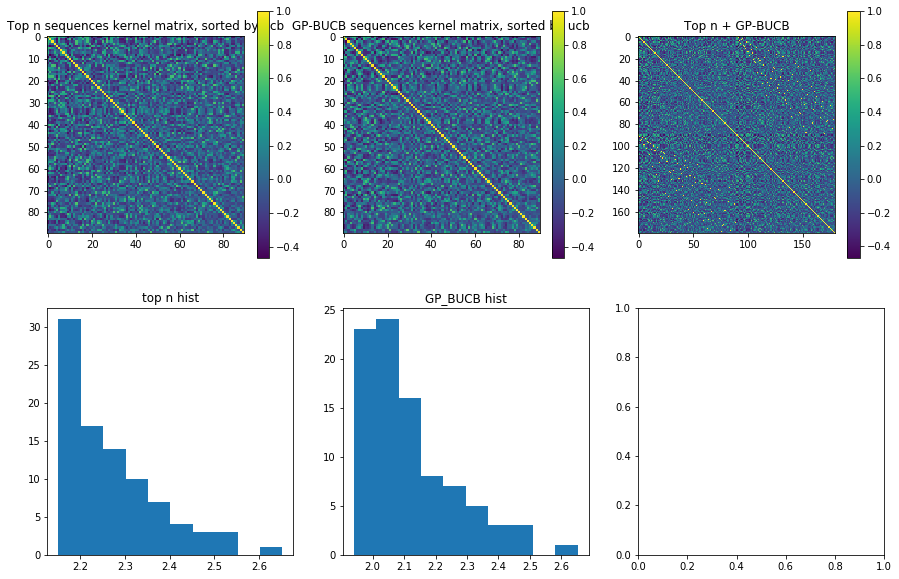

In [11]:
num_rows = 2
num_cols = 3

wd_kernel = WD_Shift_Kernel
fig,a = plt.subplots(num_rows, num_cols, figsize = (15,10))

wd_kernel.INIT_FLAG = False
im = a[0][0].imshow(wd_kernel(l=6, features = np.asarray(top_n_rec_df['RBS'])).kernel_all_normalised, cmap = 'viridis')
fig.colorbar(im, ax =a[0][0])
a[0][0].set_title('Top n sequences kernel matrix, sorted by ucb')

wd_kernel.INIT_FLAG = False
im = a[0][1].imshow(wd_kernel(l=6, features = np.asarray(gpbucb_rec_df['RBS'])).kernel_all_normalised, cmap = 'viridis')
fig.colorbar(im, ax =a[0][1])
a[0][1].set_title('GP-BUCB sequences kernel matrix, sorted by ucb')

wd_kernel.INIT_FLAG = False
all_features = np.concatenate((np.asarray(top_n_rec_df['RBS']), np.asarray(gpbucb_rec_df['RBS'])), axis = 0)
im = a[0][2].imshow(wd_kernel(l=6, features = all_features).kernel_all_normalised, cmap = 'viridis')
fig.colorbar(im, ax =a[0][2])
a[0][2].set_title('Top n + GP-BUCB')

im = a[1][0].hist(top_n_rec_df['ucb'])
a[1][0].set_title('top n hist')

im = a[1][1].hist(gpbucb_rec_df['ucb'])
a[1][1].set_title('GP_BUCB hist')

# im = a[1][2].hist(gpbucb_rec_df['ucb'])
# a[1][2].set_title('GP_BUCB hist')

In [12]:
common_rec = set(top_n_rec_df['RBS']).intersection(set(gpbucb_rec_df['RBS']))
print('Number of intersection of recommendations: ', len(common_rec))

Number of intersection of recommendations:  79


In [13]:
para_name = '_alpha' + str(alpha) + '_beta' + str(beta)

with pd.ExcelWriter('batch_ucb.xlsx', engine="openpyxl", mode='a') as writer:
    top_n_rec_df.to_excel(writer, sheet_name = 'top_n' + para_name)
    gpbucb_rec_df.to_excel(writer, sheet_name = 'gpbucb' + para_name)